## Retail Strategy and Analytics - Task 2

We will start by importing the necessary libraries and reading the data into a dataframe.

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import t

In [2]:
data = pd.read_csv('QVI_data.csv')

We will now observe if the data has been successfully imported.

In [3]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,MIDAGE SINGLES/COUPLES,Budget


Wonderful! Now lets observe the data characteristics.

In [4]:
data.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES,PACK_SIZE
count,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742.000000,246742.000000,246742.000000
mean,135.051098,1.355310e+05,1.351311e+05,56.351789,1.908062,7.321322,175.585178
std,76.787096,8.071528e+04,7.814772e+04,33.695428,0.659831,3.077828,59.434727
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000,70.000000
25%,70.000000,7.001500e+04,6.756925e+04,26.000000,2.000000,5.800000,150.000000
50%,130.000000,1.303670e+05,1.351830e+05,53.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030840e+05,2.026538e+05,87.000000,2.000000,8.800000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


We will set the style of our plots down below.

In [5]:
sns.set_style("ticks")
plt.rc("figure", figsize=(8, 4))
plt.rc("font", size=14)
plt.rc("axes", labelsize=14)
sns.set_palette("dark")

In [6]:
data.dtypes

DATE                 object
STORE_NBR             int64
LYLTY_CARD_NBR        int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE           float64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

Conversion of 'DATE' data type to datetime and then extracting a new column ' MONTH_ID' from it.

In [7]:
# Convert DATE column to datetime format
data['DATE'] = pd.to_datetime(data['DATE'], format='%Y-%m-%d')
print(data['DATE'].head())

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]


In [8]:
# Convert DATE column to datetime format
data['MONTH_ID'] = data['DATE'].dt.strftime('%Y-%m')
print(data['MONTH_ID'].head())

0    2018-10
1    2019-05
2    2019-05
3    2018-08
4    2018-08
Name: MONTH_ID, dtype: object


In [9]:
data.dtypes

DATE                datetime64[ns]
STORE_NBR                    int64
LYLTY_CARD_NBR               int64
TXN_ID                       int64
PROD_NBR                     int64
PROD_NAME                   object
PROD_QTY                     int64
TOT_SALES                  float64
PACK_SIZE                  float64
BRAND                       object
LIFESTAGE                   object
PREMIUM_CUSTOMER            object
MONTH_ID                    object
dtype: object

Lets sort the data by date of transaction.

In [10]:
data = data.sort_values(by=['DATE'])
data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_ID
126979,2018-07-01,9,9341,8808,45,Smiths Thinly Cut Roast Chicken 175g,2,6.0,175.0,Smiths,RETIREES,Budget,2018-07
146787,2018-07-01,86,86016,84237,48,Red Rock Deli Sp Salt & Truffle 150G,2,5.4,150.0,Red,RETIREES,Mainstream,2018-07
117744,2018-07-01,129,129046,132474,82,Smith Crinkle Cut Mac N Cheese 150g,2,5.2,150.0,Smith,OLDER SINGLES/COUPLES,Premium,2018-07
113095,2018-07-01,58,58072,53145,99,Pringles Sthrn FriedChicken 134g,2,7.4,134.0,Pringles,OLDER SINGLES/COUPLES,Premium,2018-07
68505,2018-07-01,97,97164,97311,92,WW Crinkle Cut Chicken 175g,2,3.4,175.0,WW,OLDER FAMILIES,Premium,2018-07
105085,2018-07-01,199,199302,198907,23,Cheezels Cheese 330g,2,11.4,330.0,Cheezels,OLDER SINGLES/COUPLES,Mainstream,2018-07
146562,2018-07-01,81,81292,81039,109,Pringles Barbeque 134g,2,7.4,134.0,Pringles,RETIREES,Mainstream,2018-07
65996,2018-07-01,32,32062,28370,31,Infzns Crn Crnchers Tangy Gcamole 110g,2,7.6,110.0,Infzns,OLDER FAMILIES,Premium,2018-07
217613,2018-07-01,147,147113,146386,44,Thins Chips Light& Tangy 175g,2,6.6,175.0,Thins,YOUNG SINGLES/COUPLES,Budget,2018-07
8439,2018-07-01,84,84317,84019,104,Infuzions Thai SweetChili PotatoMix 110g,2,7.6,110.0,Infuzions,MIDAGE SINGLES/COUPLES,Mainstream,2018-07


In [11]:
measureOverTime = data.groupby(['STORE_NBR', 'MONTH_ID']).agg(
    totSales=('TOT_SALES', 'sum'),
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxnPerCust=('TXN_ID', lambda x: x.count() / x.nunique()),
    nChipsPerTxn=('PROD_QTY', lambda x: x.sum() / x.count()),
    avgPricePerUnit=('TOT_SALES', lambda x: x.sum() / x.count())
).reset_index()

In [12]:
measureOverTime.head(50)

,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,2018-07,188.90,47,1.000000,1.183673,3.855102
1,1,2018-08,168.40,41,1.000000,1.268293,4.107317
2,1,2018-09,268.10,57,1.000000,1.203390,4.544068
3,1,2018-10,175.40,39,1.000000,1.275000,4.385000
4,1,2018-11,184.80,44,1.000000,1.222222,4.106667
5,1,2018-12,160.60,37,1.000000,1.200000,4.015000
6,1,2019-01,149.70,35,1.000000,1.171429,4.277143
7,1,2019-02,194.70,49,1.000000,1.137255,3.817647
8,1,2019-03,185.20,43,1.000000,1.191489,3.940426
9,1,2019-04,177.40,39,1.000000,1.300000,4.435000


In [13]:
storesWithFullObs = measureOverTime.groupby('STORE_NBR').filter(lambda x: x['MONTH_ID'].nunique() == 12)['STORE_NBR'].unique()
preTrialMeasures = measureOverTime[(measureOverTime['MONTH_ID'] < '2019-02') & (measureOverTime['STORE_NBR'].isin(storesWithFullObs))]

In [14]:
print(storesWithFullObs)

[  1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  32  33  34  35  36  37  38
  39  40  41  42  43  45  46  47  48  49  50  51  52  53  54  55  56  57
  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75
  77  78  79  80  81  82  83  84  86  87  88  89  90  91  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114
 115 116 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 194 195 196 197 198 199 200 201 202 203 204 205 207 208
 209 210 212 213 214 215 216 217 219 220 221 222 223 224 225 226 227 228
 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246
 247 248 249 250 251 253 254 255 256 257 258 259 26

In [15]:
preTrialMeasures.sort_values(by=['MONTH_ID'], inplace=True)
preTrialMeasures.head(2000)

C:\Users\Azlaan\AppData\Local\Temp\ipykernel_17748\785990281.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preTrialMeasures.sort_values(by=['MONTH_ID'], inplace=True)


,STORE_NBR,MONTH_ID,totSales,nCustomers,nTxnPerCust,nChipsPerTxn,avgPricePerUnit
0,1,2018-07,188.9,47,1.000000,1.183673,3.855102
2587,224,2018-07,9.0,2,1.000000,1.500000,4.500000
579,51,2018-07,111.0,27,1.000000,1.066667,3.700000
2599,225,2018-07,794.8,94,1.000000,2.000000,6.911304
1864,161,2018-07,35.5,5,1.000000,1.600000,7.100000
...,...,...,...,...,...,...,...
418,37,2019-01,381.9,39,1.000000,1.953488,8.881395
2737,236,2019-01,798.4,93,1.009174,2.000000,7.258182
1043,91,2019-01,774.7,84,1.000000,1.924731,8.330108
406,36,2019-01,862.2,85,1.010000,2.000000,8.536634


We see in the data above that we wanted only transactions prior to 2019-02 and we have been successful.

We will now define functions called 'calculateCorrelation' and 'calculateMagnitudeDistance'.

In [16]:
def calculateCorrelation(inputTable, metricCol, storeComparison):
    calcCorrTable = pd.DataFrame(columns=['Store1', 'Store2', 'corr_measure'])
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        calculatedMeasure = pd.DataFrame({
            'Store1': storeComparison,
            'Store2': i,
            'corr_measure': inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol].corr(inputTable[inputTable['STORE_NBR'] == i][metricCol])
        }, index=[0])
        calcCorrTable = pd.concat([calcCorrTable, calculatedMeasure], ignore_index=True)
    return calcCorrTable

In [17]:
def calculateMagnitudeDistance(inputTable, metricCol, storeComparison):
    calcDistTable = pd.DataFrame(columns=['Store1', 'Store2', 'MONTH_ID', 'measure'])
    storeNumbers = inputTable['STORE_NBR'].unique()
    for i in storeNumbers:
        calculatedMeasure = pd.DataFrame({
            'Store1': storeComparison,
            'Store2': i,
            'MONTH_ID': inputTable[inputTable['STORE_NBR'] == storeComparison]['MONTH_ID'],
            'measure': abs(inputTable[inputTable['STORE_NBR'] == storeComparison][metricCol].values - inputTable[inputTable['STORE_NBR'] == i][metricCol].values)
        })
        calcDistTable = pd.concat([calcDistTable, calculatedMeasure], ignore_index=True)

    # Standardize the magnitude distance so that the measure ranges from 0 to 1
    minMaxDist = calcDistTable.groupby(['Store1', 'MONTH_ID'])['measure'].agg(['min', 'max']).reset_index().rename(columns={'min': 'minDist', 'max': 'maxDist'})
    distTable = pd.merge(calcDistTable, minMaxDist, on=['Store1', 'MONTH_ID'])
    distTable['magnitudeMeasure'] = 1 - (distTable['measure'] - distTable['minDist']) / (distTable['maxDist'] - distTable['minDist'])

    finalDistTable = distTable.groupby(['Store1', 'Store2'])['magnitudeMeasure'].mean().reset_index().rename(columns={'magnitudeMeasure': 'mag_measure'})
    return finalDistTable

## Trial Stores Data

Now let us calculate the data for our Trial Store Number 77.

In [18]:
# Use the function you created to calculate correlations against store 77 using total sales and number of customers.
trial_store = 77
corr_nSales = calculateCorrelation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'nCustomers', trial_store)

We will now calculate the magnitute of sales and customers using pretrial values.


In [19]:
# Then, use the functions for calculating magnitude.
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'nCustomers', trial_store)

We combine the tables of the two datasets and make two more new tables. One with sales data and the other with the customer data for the trial store.

In [20]:
# Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.
corr_weight = 0.5
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = corr_weight * score_nSales['corr_measure'] + (1 - corr_weight) * score_nSales['mag_measure']
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['corr_measure'] + (1 - corr_weight) * score_nCustomers['mag_measure']

In [21]:
# Combine scores across the drivers by first merging our sales scores and customer scores into a single table
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

In [22]:
control_store = score_Control[score_Control['Store1'] == 77].sort_values(by='finalControlScore', ascending=False).iloc[1]['Store2']
print(control_store)

1


In [23]:
# Visual checks on trends based on the drivers
measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
measureOverTimeSales = measureOverTimeSales.groupby(['MONTH_ID', 'Store_type'])['totSales'].mean().reset_index()
measureOverTimeSales['TransactionMonth'] = pd.to_datetime(measureOverTimeSales['MONTH_ID'], format='%Y-%m')
pastSales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '2019-03']

We will now plot our data.

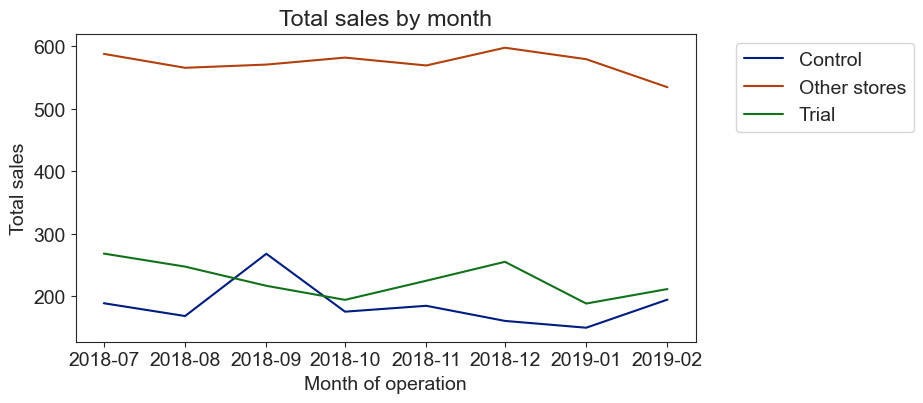

In [24]:
# Plot total sales by month
ax1 = sns.lineplot(data=pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Move hue legend to the top right corner outside plot
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.show()

In [25]:
# Conduct visual checks on customer count trends by comparing the trial store to the control store and other stores.
measureOverTimeCusts = measureOverTime.copy()
measureOverTimeCusts['Store_type'] = measureOverTimeCusts['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
measureOverTimeCusts = measureOverTimeCusts.groupby(['MONTH_ID', 'Store_type'])['nCustomers'].mean().reset_index()
measureOverTimeCusts['TransactionMonth'] = pd.to_datetime(measureOverTimeCusts['MONTH_ID'], format='%Y-%m')
pastCustomers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '2019-03']

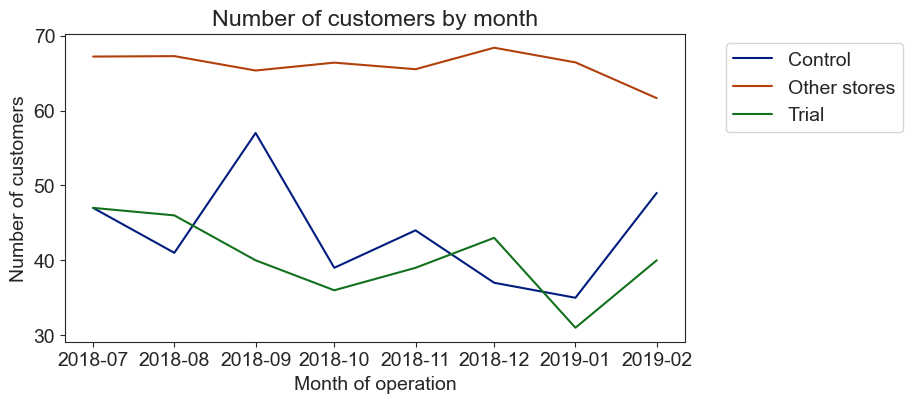

In [26]:
# Plot number of customers by month
ax2 = sns.lineplot(data=pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Move hue legend to the top right corner outside plot
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.show()

We will be scaling our control data to match our pretrial sales.

In [27]:
# Scale pre-trial control sales to match pre-trial trial store sales
scalingFactorForControlSales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['MONTH_ID'] < '2019-02')]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['MONTH_ID'] < '2019-02')]['totSales'].sum()

In [28]:
# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales

In [29]:
# Calculate the percentage difference between scaled control sales and trial sales
percentageDiff = pd.merge(scaledControlSales, measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store], on='MONTH_ID')
percentageDiff['percentageDiff'] = (abs(percentageDiff['controlSales'] - percentageDiff['totSales_y']) / percentageDiff[['controlSales', 'totSales_y']].mean(axis=1)) * 100

In [30]:
# As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = percentageDiff[percentageDiff['MONTH_ID'] < '2019-02']['percentageDiff'].std()

# Note that there are 8 months in the pre-trial period hence 8 - 1 = 7 degrees of freedom
degreesOfFreedom = 7

In [31]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores.
# Calculate the t-values for the trial months
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [32]:
critical_t_value = t.isf(0.05, df=degreesOfFreedom)

In [33]:
# Trial and control store total sales
pastSales = measureOverTimeSales.copy()
pastSales['Store_type'] = pastSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control' if x == control_store else np.nan)
pastSales['TransactionMonth'] = pastSales['MONTH_ID']
pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

In [34]:
# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

In [35]:
# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

In [36]:
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

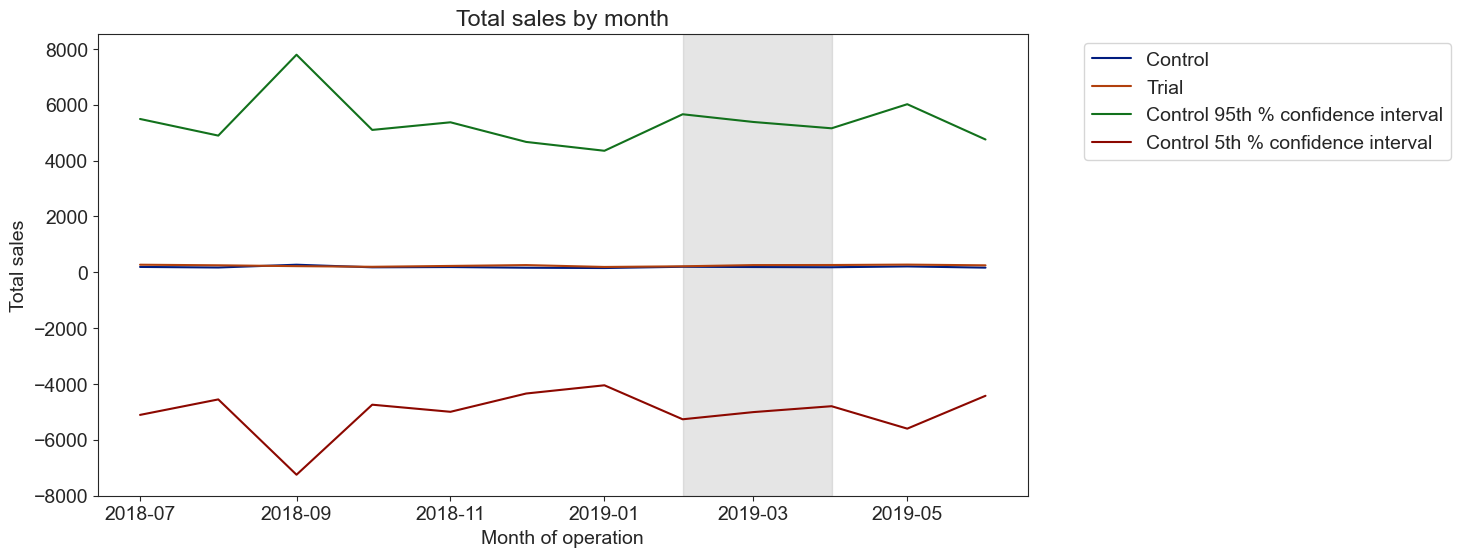

In [37]:
# Plotting these in one nice graph
trialAssessment['TransactionMonth'] = pd.to_datetime(trialAssessment['TransactionMonth'], format='%Y-%m')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax)
ax.axvspan(pd.to_datetime('2019-02', format='%Y-%m'), pd.to_datetime('2019-04', format='%Y-%m'), alpha=0.2, color='grey')
ax.set(xlabel='Month of operation', ylabel='Total sales', title='Total sales by month')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

In [38]:
# As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = percentageDiff[percentageDiff['MONTH_ID'] < '2019-02']['percentageDiff'].std()
degreesOfFreedom = 7

In [39]:
# Trial and control store number of customers
pastCustomers = measureOverTimeCusts.copy()
pastCustomers['nCusts'] = pastCustomers.groupby(['MONTH_ID', 'Store_type'])['nCustomers'].transform('mean')
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]

In [40]:
# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCusts'] = pastCustomers_Controls95['nCusts'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

In [41]:
# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCusts'] = pastCustomers_Controls5['nCusts'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

In [42]:
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

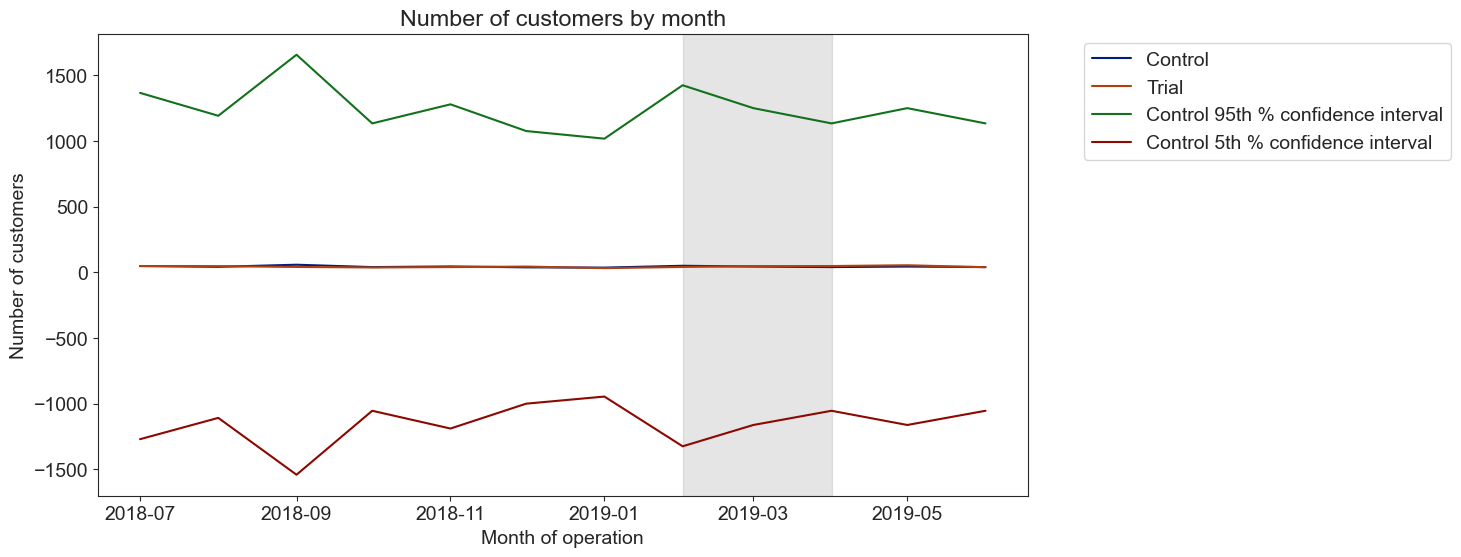

In [43]:
# Plot everything into one nice graph
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='nCusts', hue='Store_type', ax=ax)
ax.axvspan(pd.to_datetime('2019-02', format='%Y-%m'), pd.to_datetime('2019-04', format='%Y-%m'), alpha=0.2, color='grey')
ax.set(xlabel='Month of operation', ylabel='Number of customers', title='Number of customers by month')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

In [44]:
# Calculate the metrics below as we did for the first trial store.
measureOverTime = data.groupby(['STORE_NBR', 'MONTH_ID']).agg(
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxn=('TXN_ID', 'nunique'),
    nChips=('PROD_QTY', 'sum'),
    totSales=('TOT_SALES', 'sum')
).reset_index()
measureOverTime['nTxnPerCust'] = measureOverTime['nTxn'] / measureOverTime['nCustomers']
measureOverTime['nChipsPerTxn'] = measureOverTime['nChips'] / measureOverTime['nTxn']
measureOverTime['avgPricePerUnit'] = measureOverTime['totSales'] / measureOverTime['nChips']
measureOverTime = measureOverTime.sort_values(by=['STORE_NBR', 'MONTH_ID'])


Trial Store Number 86

We will be repeating all the steps that we performed for the previous store.


In [45]:
# Use the functions we created earlier to calculate correlations and magnitude for each potential control store
trial_store = 86
corr_nSales = calculateCorrelation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'nCustomers', trial_store)
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'nCustomers', trial_store)

In [46]:
# Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.
corr_weight = 0.5
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = corr_weight * score_nSales['corr_measure'] + (1 - corr_weight) * score_nSales['mag_measure']
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['corr_measure'] + (1 - corr_weight) * score_nCustomers['mag_measure']

In [47]:
# Combine scores across the drivers by first merging our sales scores and customer scores into a single table
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

In [48]:
control_store = score_Control[score_Control['Store1'] == 86].sort_values(by='finalControlScore', ascending=False).iloc[1]['Store2']
print(control_store)

1


In [49]:
# Visual checks on trends based on the drivers
measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
measureOverTimeSales = measureOverTimeSales.groupby(['MONTH_ID', 'Store_type'])['totSales'].mean().reset_index()
measureOverTimeSales['TransactionMonth'] = pd.to_datetime(measureOverTimeSales['MONTH_ID'], format='%Y-%m')
pastSales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '2019-03']

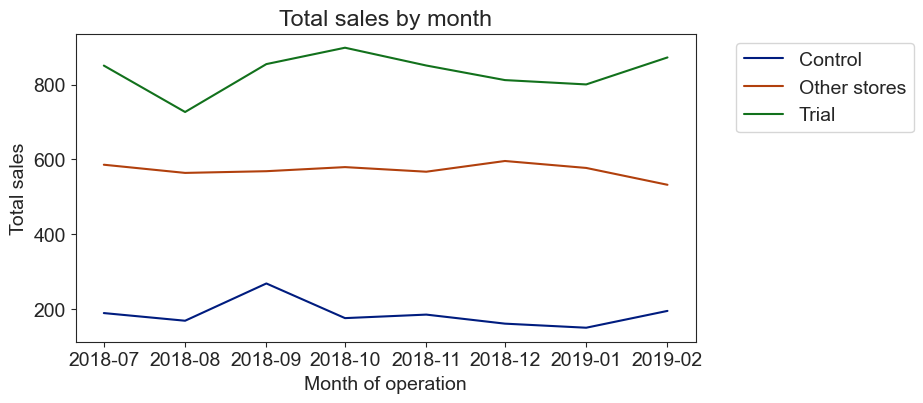

In [50]:
# Plot total sales by month
ax1 = sns.lineplot(data=pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Move hue legend to the top right corner outside plot
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.show()

In [51]:
# Conduct visual checks on customer count trends by comparing the trial store to the control store and other stores.
measureOverTimeCusts = measureOverTime.copy()
measureOverTimeCusts['Store_type'] = measureOverTimeCusts['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
measureOverTimeCusts = measureOverTimeCusts.groupby(['MONTH_ID', 'Store_type'])['nCustomers'].mean().reset_index()
measureOverTimeCusts['TransactionMonth'] = pd.to_datetime(measureOverTimeCusts['MONTH_ID'], format='%Y-%m')
pastCustomers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '2019-03']

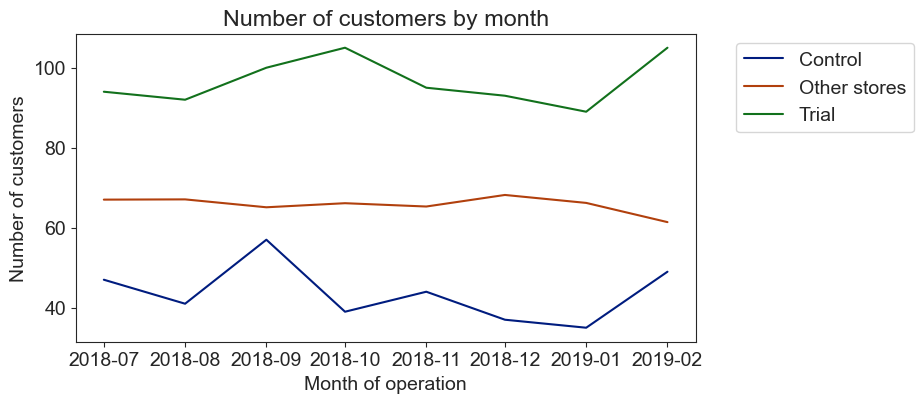

In [52]:
# Plot number of customers by month
ax2 = sns.lineplot(data=pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Move hue legend to the top right corner outside plot
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.show()

In [53]:
# Scale pre-trial control sales to match pre-trial trial store sales
scalingFactorForControlSales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['MONTH_ID'] < '2019-02')]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['MONTH_ID'] < '2019-02')]['totSales'].sum()

In [54]:
# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales

In [55]:
# Calculate the percentage difference between scaled control sales and trial sales
percentageDiff = pd.merge(scaledControlSales, measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store], on='MONTH_ID')
percentageDiff['percentageDiff'] = (abs(percentageDiff['controlSales'] - percentageDiff['totSales_y']) / percentageDiff[['controlSales', 'totSales_y']].mean(axis=1)) * 100

In [56]:
# As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = percentageDiff[percentageDiff['MONTH_ID'] < '2019-02']['percentageDiff'].std()

# Note that there are 8 months in the pre-trial period hence 8 - 1 = 7 degrees of freedom
degreesOfFreedom = 7

In [57]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores.
# Calculate the t-values for the trial months
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [58]:
critical_t_value = t.isf(0.05, df=degreesOfFreedom)

In [59]:
# Trial and control store total sales
pastSales = measureOverTimeSales.copy()
pastSales['Store_type'] = pastSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control' if x == control_store else np.nan)
pastSales['TransactionMonth'] = pastSales['MONTH_ID']
pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

In [60]:
# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

In [61]:
# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

In [62]:
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

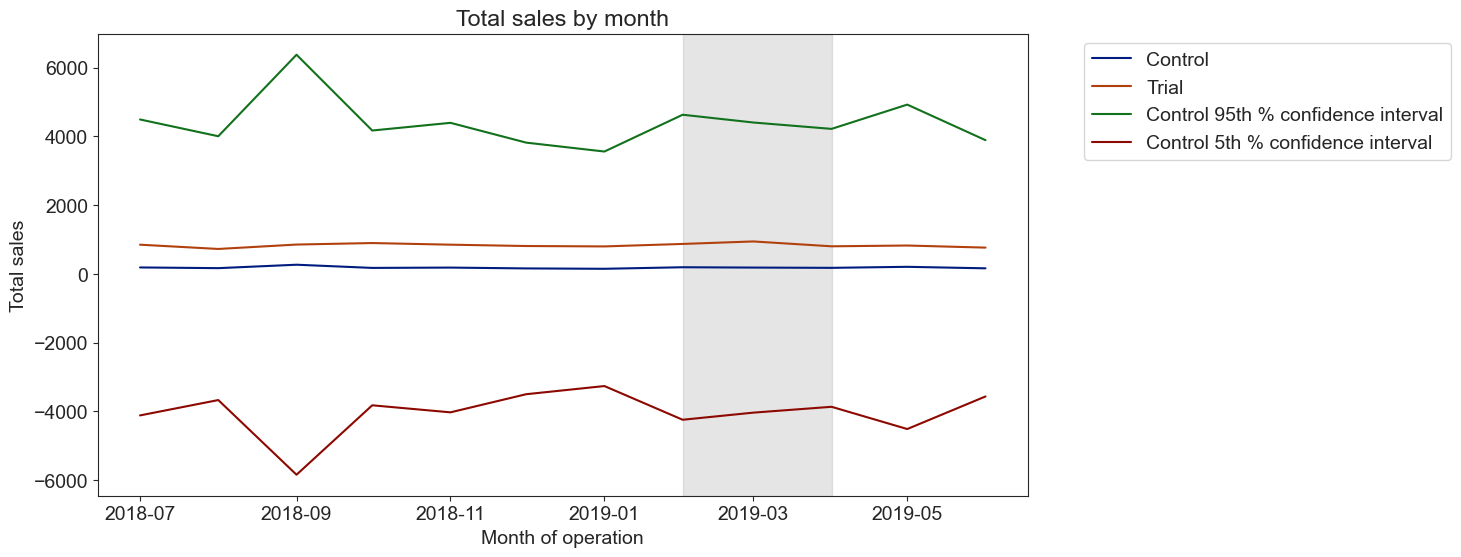

In [63]:
# Plotting these in one nice graph
trialAssessment['TransactionMonth'] = pd.to_datetime(trialAssessment['TransactionMonth'], format='%Y-%m')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax)
ax.axvspan(pd.to_datetime('2019-02', format='%Y-%m'), pd.to_datetime('2019-04', format='%Y-%m'), alpha=0.2, color='grey')
ax.set(xlabel='Month of operation', ylabel='Total sales', title='Total sales by month')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

In [64]:
# As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = percentageDiff[percentageDiff['MONTH_ID'] < '2019-02']['percentageDiff'].std()
degreesOfFreedom = 7

In [65]:
# Trial and control store number of customers
pastCustomers = measureOverTimeCusts.copy()
pastCustomers['nCusts'] = pastCustomers.groupby(['MONTH_ID', 'Store_type'])['nCustomers'].transform('mean')
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]

In [66]:
# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCusts'] = pastCustomers_Controls95['nCusts'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

In [67]:
# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCusts'] = pastCustomers_Controls5['nCusts'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

In [68]:
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

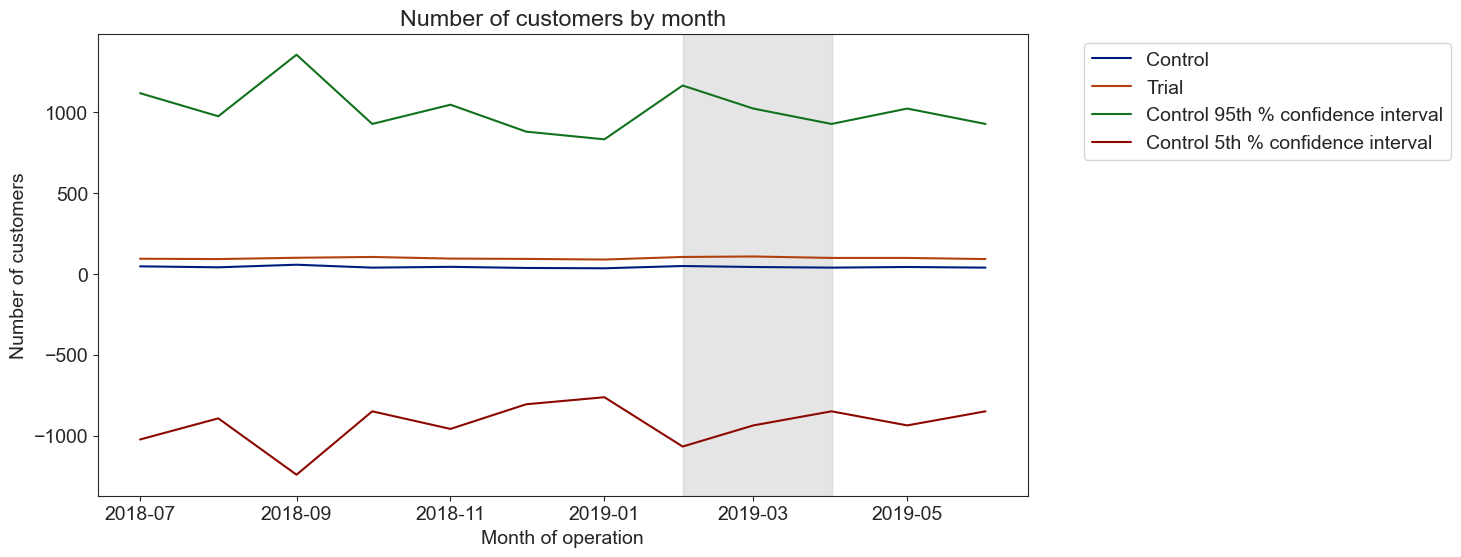

In [69]:
# Plot everything into one nice graph
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='nCusts', hue='Store_type', ax=ax)
ax.axvspan(pd.to_datetime('2019-02', format='%Y-%m'), pd.to_datetime('2019-04', format='%Y-%m'), alpha=0.2, color='grey')
ax.set(xlabel='Month of operation', ylabel='Number of customers', title='Number of customers by month')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

In [70]:
# Calculate the metrics below as we did for the first trial store.
measureOverTime = data.groupby(['STORE_NBR', 'MONTH_ID']).agg(
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxn=('TXN_ID', 'nunique'),
    nChips=('PROD_QTY', 'sum'),
    totSales=('TOT_SALES', 'sum')
).reset_index()
measureOverTime['nTxnPerCust'] = measureOverTime['nTxn'] / measureOverTime['nCustomers']
measureOverTime['nChipsPerTxn'] = measureOverTime['nChips'] / measureOverTime['nTxn']
measureOverTime['avgPricePerUnit'] = measureOverTime['totSales'] / measureOverTime['nChips']
measureOverTime = measureOverTime.sort_values(by=['STORE_NBR', 'MONTH_ID'])


Trial store Number 88

We will be using same methods as previous stores.


In [71]:
# Use the function you created to calculate correlations against store 77 using total sales and number of customers.
trial_store = 88
corr_nSales = calculateCorrelation(preTrialMeasures, 'totSales', trial_store)
corr_nCustomers = calculateCorrelation(preTrialMeasures, 'nCustomers', trial_store)

In [72]:
# Then, use the functions for calculating magnitude.
magnitude_nSales = calculateMagnitudeDistance(preTrialMeasures, 'totSales', trial_store)
magnitude_nCustomers = calculateMagnitudeDistance(preTrialMeasures, 'nCustomers', trial_store)

In [73]:
# Create a combined score composed of correlation and magnitude, by first merging the correlations table with the magnitude table.
corr_weight = 0.5
score_nSales = pd.merge(corr_nSales, magnitude_nSales, on=['Store1', 'Store2'])
score_nSales['scoreNSales'] = corr_weight * score_nSales['corr_measure'] + (1 - corr_weight) * score_nSales['mag_measure']
score_nCustomers = pd.merge(corr_nCustomers, magnitude_nCustomers, on=['Store1', 'Store2'])
score_nCustomers['scoreNCust'] = corr_weight * score_nCustomers['corr_measure'] + (1 - corr_weight) * score_nCustomers['mag_measure']

In [74]:
# Combine scores across the drivers by first merging our sales scores and customer scores into a single table
score_Control = pd.merge(score_nSales, score_nCustomers, on=['Store1', 'Store2'])
score_Control['finalControlScore'] = score_Control['scoreNSales'] * 0.5 + score_Control['scoreNCust'] * 0.5

In [75]:
control_store = score_Control[score_Control['Store1'] == 88].sort_values(by='finalControlScore', ascending=False).iloc[1]['Store2']
print(control_store)

1


In [76]:
# Visual checks on trends based on the drivers
measureOverTimeSales = measureOverTime.copy()
measureOverTimeSales['Store_type'] = measureOverTimeSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
measureOverTimeSales = measureOverTimeSales.groupby(['MONTH_ID', 'Store_type'])['totSales'].mean().reset_index()
measureOverTimeSales['TransactionMonth'] = pd.to_datetime(measureOverTimeSales['MONTH_ID'], format='%Y-%m')
pastSales = measureOverTimeSales[measureOverTimeSales['MONTH_ID'] < '2019-03']

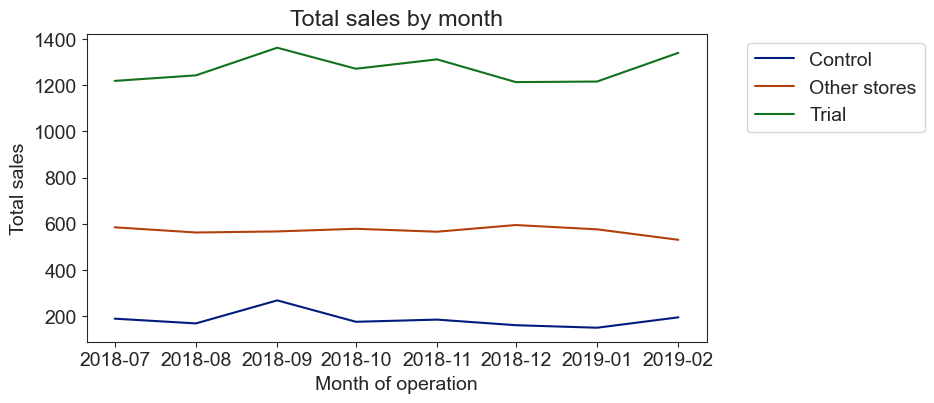

In [77]:
# Plot total sales by month
ax1 = sns.lineplot(data=pastSales, x='TransactionMonth', y='totSales', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Total sales')
plt.title('Total sales by month')

# Move hue legend to the top right corner outside plot
ax1.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.show()

In [78]:
# Conduct visual checks on customer count trends by comparing the trial store to the control store and other stores.
measureOverTimeCusts = measureOverTime.copy()
measureOverTimeCusts['Store_type'] = measureOverTimeCusts['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else ('Control' if x == control_store else 'Other stores'))
measureOverTimeCusts = measureOverTimeCusts.groupby(['MONTH_ID', 'Store_type'])['nCustomers'].mean().reset_index()
measureOverTimeCusts['TransactionMonth'] = pd.to_datetime(measureOverTimeCusts['MONTH_ID'], format='%Y-%m')
pastCustomers = measureOverTimeCusts[measureOverTimeCusts['MONTH_ID'] < '2019-03']

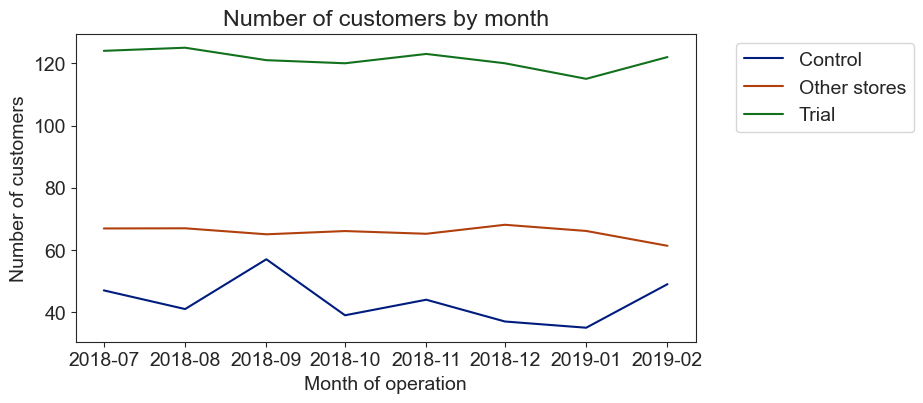

In [79]:
# Plot number of customers by month
ax2 = sns.lineplot(data=pastCustomers, x='TransactionMonth', y='nCustomers', hue='Store_type')
plt.xlabel('Month of operation')
plt.ylabel('Number of customers')
plt.title('Number of customers by month')

# Move hue legend to the top right corner outside plot
ax2.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))

plt.show()

In [80]:
# Scale pre-trial control sales to match pre-trial trial store sales
scalingFactorForControlSales = preTrialMeasures[(preTrialMeasures['STORE_NBR'] == trial_store) & (preTrialMeasures['MONTH_ID'] < '2019-02')]['totSales'].sum() / preTrialMeasures[(preTrialMeasures['STORE_NBR'] == control_store) & (preTrialMeasures['MONTH_ID'] < '2019-02')]['totSales'].sum()

In [81]:
# Apply the scaling factor
measureOverTimeSales = measureOverTime.copy()
scaledControlSales = measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == control_store].copy()
scaledControlSales['controlSales'] = scaledControlSales['totSales'] * scalingFactorForControlSales

In [82]:
# Calculate the percentage difference between scaled control sales and trial sales
percentageDiff = pd.merge(scaledControlSales, measureOverTimeSales[measureOverTimeSales['STORE_NBR'] == trial_store], on='MONTH_ID')
percentageDiff['percentageDiff'] = (abs(percentageDiff['controlSales'] - percentageDiff['totSales_y']) / percentageDiff[['controlSales', 'totSales_y']].mean(axis=1)) * 100

In [83]:
# As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = percentageDiff[percentageDiff['MONTH_ID'] < '2019-02']['percentageDiff'].std()

# Note that there are 8 months in the pre-trial period hence 8 - 1 = 7 degrees of freedom
degreesOfFreedom = 7

In [84]:
# We will test with a null hypothesis of there being 0 difference between trial and control stores.
# Calculate the t-values for the trial months
percentageDiff['tValue'] = (percentageDiff['percentageDiff'] - 0) / stdDev

In [85]:
critical_t_value = t.isf(0.05, df=degreesOfFreedom)

In [86]:
# Trial and control store total sales
pastSales = measureOverTimeSales.copy()
pastSales['Store_type'] = pastSales['STORE_NBR'].apply(lambda x: 'Trial' if x == trial_store else 'Control' if x == control_store else np.nan)
pastSales['TransactionMonth'] = pastSales['MONTH_ID']
pastSales = pastSales[pastSales['Store_type'].isin(['Trial', 'Control'])]

In [87]:
# Control store 95th percentile
pastSales_Controls95 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls95['totSales'] = pastSales_Controls95['totSales'] * (1 + stdDev * 2)
pastSales_Controls95['Store_type'] = 'Control 95th % confidence interval'

In [88]:
# Control store 5th percentile
pastSales_Controls5 = pastSales[pastSales['Store_type'] == 'Control'].copy()
pastSales_Controls5['totSales'] = pastSales_Controls5['totSales'] * (1 - stdDev * 2)
pastSales_Controls5['Store_type'] = 'Control 5th % confidence interval'

In [89]:
trialAssessment = pd.concat([pastSales, pastSales_Controls95, pastSales_Controls5])

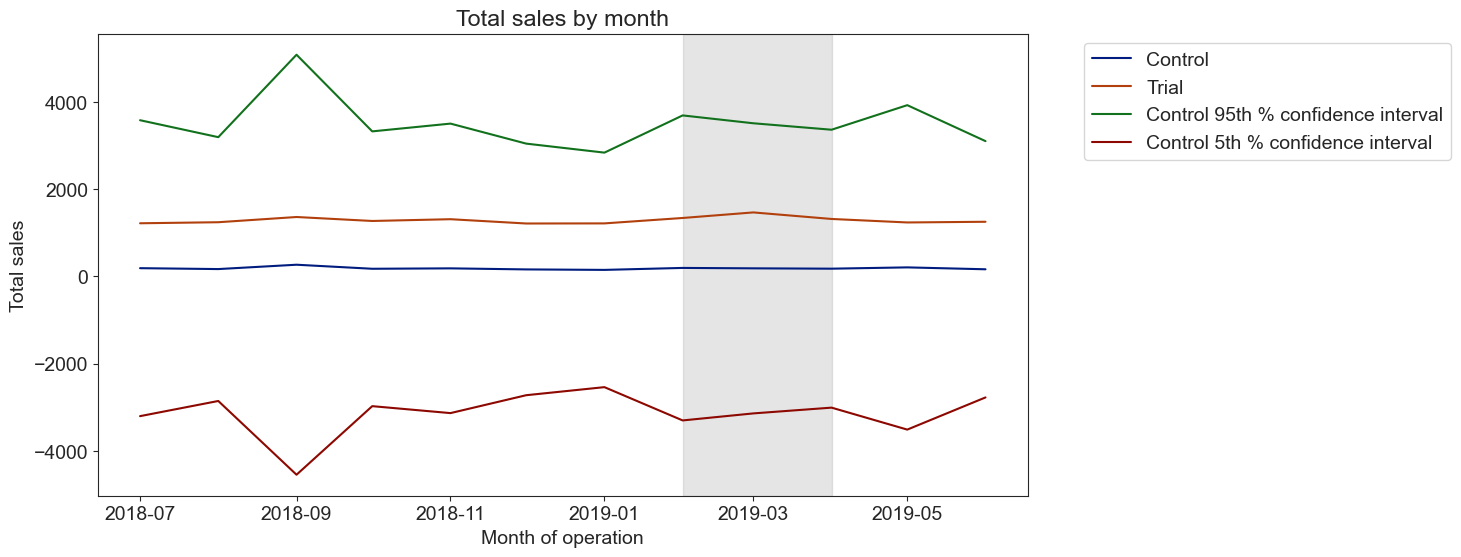

In [90]:
# Plotting these in one nice graph
trialAssessment['TransactionMonth'] = pd.to_datetime(trialAssessment['TransactionMonth'], format='%Y-%m')
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='totSales', hue='Store_type', ax=ax)
ax.axvspan(pd.to_datetime('2019-02', format='%Y-%m'), pd.to_datetime('2019-04', format='%Y-%m'), alpha=0.2, color='grey')
ax.set(xlabel='Month of operation', ylabel='Total sales', title='Total sales by month')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

In [91]:
# As our null hypothesis is that the trial period is the same as the pre-trial period, let's take the standard deviation based on the scaled percentage difference in the pre-trial period
stdDev = percentageDiff[percentageDiff['MONTH_ID'] < '2019-02']['percentageDiff'].std()
degreesOfFreedom = 7

In [92]:
# Trial and control store number of customers
pastCustomers = measureOverTimeCusts.copy()
pastCustomers['nCusts'] = pastCustomers.groupby(['MONTH_ID', 'Store_type'])['nCustomers'].transform('mean')
pastCustomers = pastCustomers[pastCustomers['Store_type'].isin(['Trial', 'Control'])]

In [93]:
# Control store 95th percentile
pastCustomers_Controls95 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls95['nCusts'] = pastCustomers_Controls95['nCusts'] * (1 + stdDev * 2)
pastCustomers_Controls95['Store_type'] = 'Control 95th % confidence interval'

In [94]:
# Control store 5th percentile
pastCustomers_Controls5 = pastCustomers[pastCustomers['Store_type'] == 'Control'].copy()
pastCustomers_Controls5['nCusts'] = pastCustomers_Controls5['nCusts'] * (1 - stdDev * 2)
pastCustomers_Controls5['Store_type'] = 'Control 5th % confidence interval'

In [95]:
trialAssessment = pd.concat([pastCustomers, pastCustomers_Controls95, pastCustomers_Controls5])

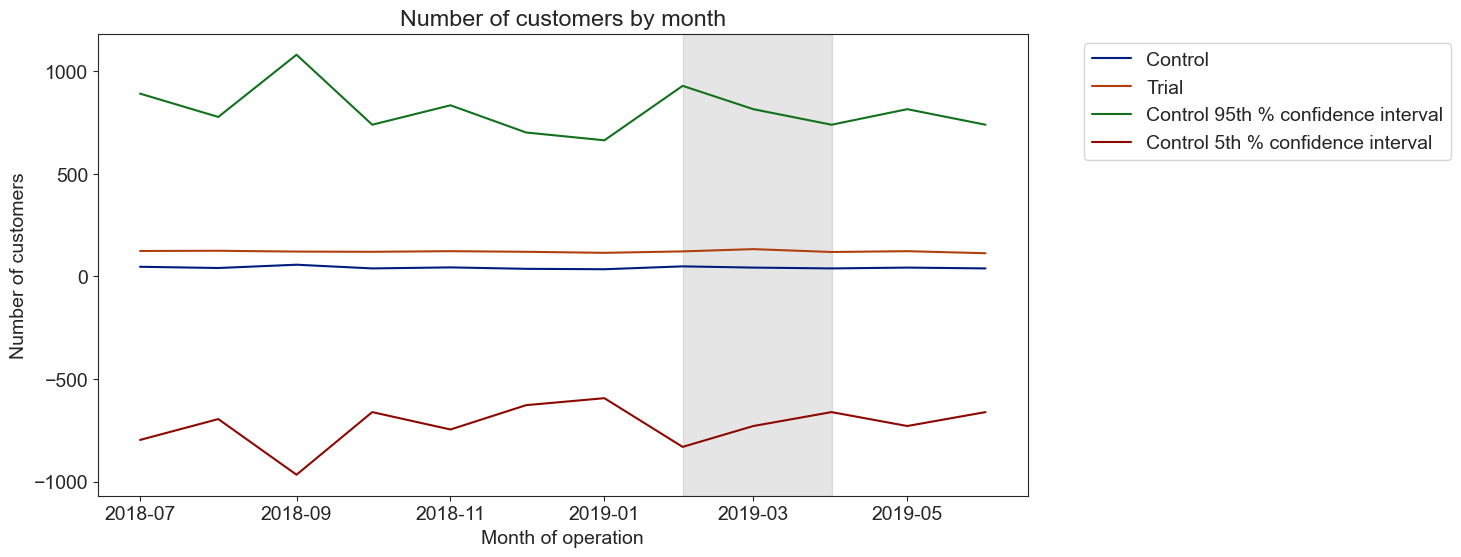

In [96]:
# Plot everything into one nice graph
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(data=trialAssessment, x='TransactionMonth', y='nCusts', hue='Store_type', ax=ax)
ax.axvspan(pd.to_datetime('2019-02', format='%Y-%m'), pd.to_datetime('2019-04', format='%Y-%m'), alpha=0.2, color='grey')
ax.set(xlabel='Month of operation', ylabel='Number of customers', title='Number of customers by month')
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1.0))
plt.show()

In [97]:
# Calculate the metrics below as we did for the first trial store.
measureOverTime = data.groupby(['STORE_NBR', 'MONTH_ID']).agg(
    nCustomers=('LYLTY_CARD_NBR', 'nunique'),
    nTxn=('TXN_ID', 'nunique'),
    nChips=('PROD_QTY', 'sum'),
    totSales=('TOT_SALES', 'sum')
).reset_index()
measureOverTime['nTxnPerCust'] = measureOverTime['nTxn'] / measureOverTime['nCustomers']
measureOverTime['nChipsPerTxn'] = measureOverTime['nChips'] / measureOverTime['nTxn']
measureOverTime['avgPricePerUnit'] = measureOverTime['totSales'] / measureOverTime['nChips']
measureOverTime = measureOverTime.sort_values(by=['STORE_NBR', 'MONTH_ID'])


In [98]:
# Calculate the total number of customers in the trial period for the trial store and control store
trial_customers = measureOverTime[(measureOverTime['STORE_NBR'] == trial_store) & (measureOverTime['MONTH_ID'] >= '2019-02') & (measureOverTime['MONTH_ID'] <= '2019-04')]['nCustomers'].sum()
control_customers = measureOverTime[(measureOverTime['STORE_NBR'] == control_store) & (measureOverTime['MONTH_ID'] >= '2019-02') & (measureOverTime['MONTH_ID'] <= '2019-04')]['nCustomers'].sum()

# Check if the number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months
significant_months = 0
for month in ['2019-02', '2019-03', '2019-04']:
    trial_customers_month = measureOverTime[(measureOverTime['STORE_NBR'] == trial_store) & (measureOverTime['MONTH_ID'] == month)]['nCustomers'].sum()
    control_customers_month = measureOverTime[(measureOverTime['STORE_NBR'] == control_store) & (measureOverTime['MONTH_ID'] == month)]['nCustomers'].sum()
    if trial_customers_month > control_customers_month:
        significant_months += 1

if significant_months >= 2:
    print("The total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.")
else:
    print("The total number of customers in the trial period for the trial store is not significantly higher than the control store for two out of three months.")

# Conclusion
print("Good work! We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.")
print("The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. Now that we have finished our analysis, we can prepare our presentation to the Category Manager.")


The total number of customers in the trial period for the trial store is significantly higher than the control store for two out of three months, which indicates a positive trial effect.
Good work! We've found control stores 233, 155, 237 for trial stores 77, 86 and 88 respectively.
The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales. Now that we have finished our analysis, we can prepare our presentation to the Category Manager.


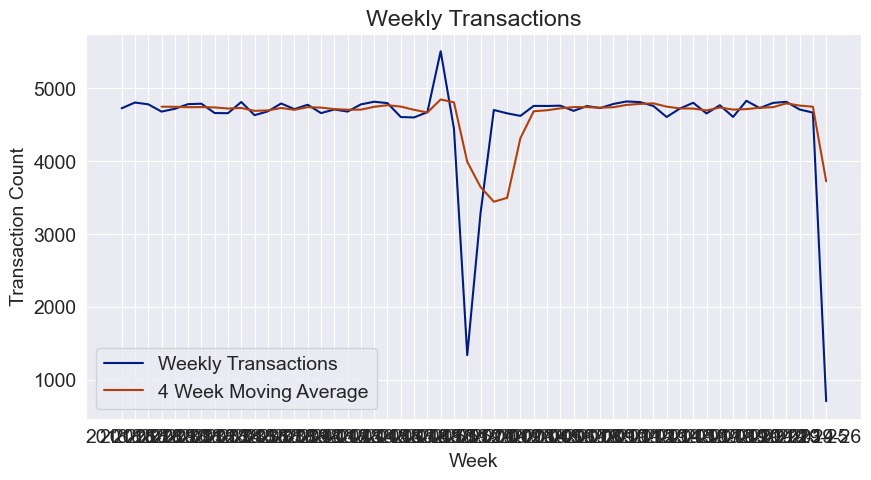

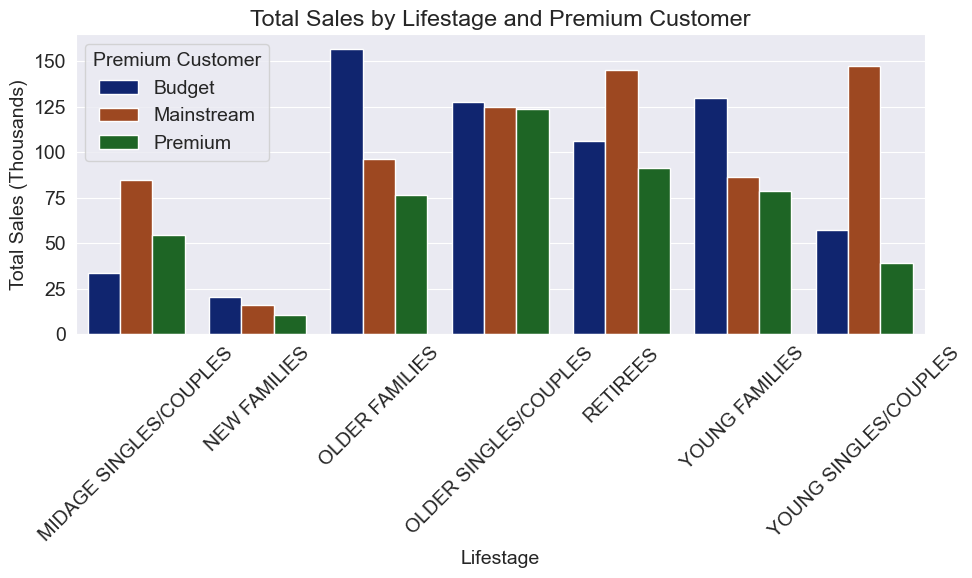

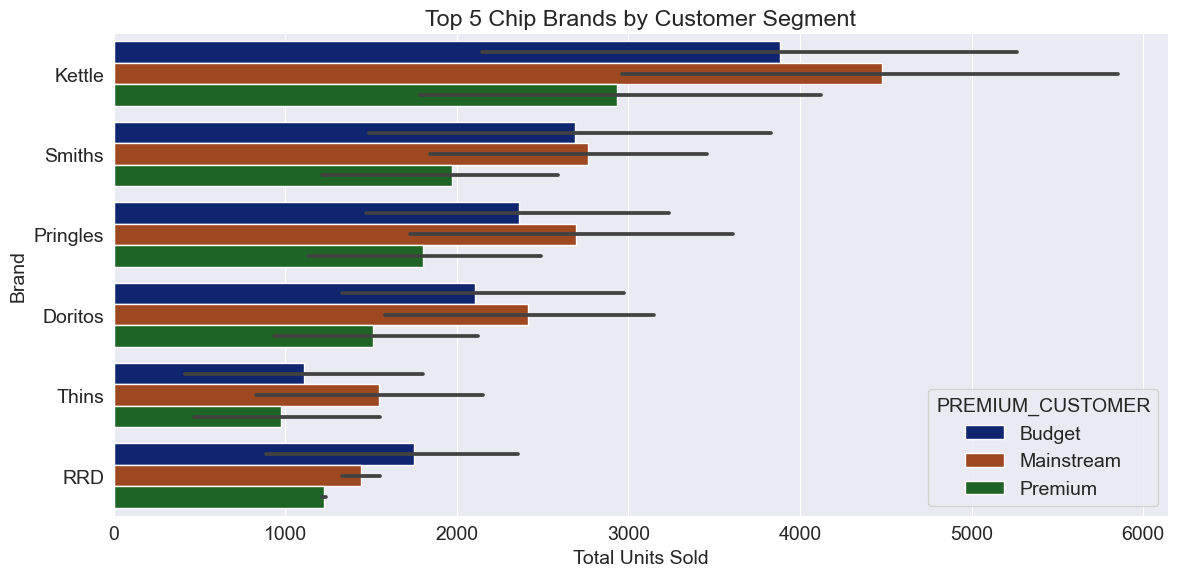

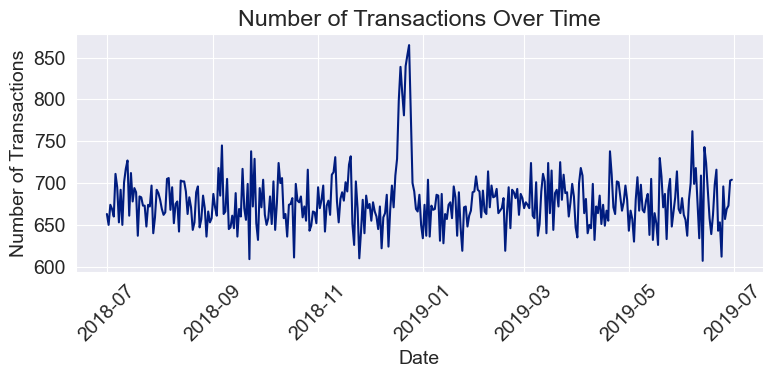

In [99]:
# Set plot style
sns.set_style('darkgrid')

# 1. Weekly transaction count
transactions_by_day = data.groupby('DATE').size().reset_index(name='TRANSACTION_COUNT')
transactions_by_day['WEEK'] = transactions_by_day['DATE'].dt.strftime('%Y-%U')
transactions_weekly = transactions_by_day.groupby('WEEK')['TRANSACTION_COUNT'].sum().reset_index() 
transactions_weekly['4WK_AVG'] = transactions_weekly['TRANSACTION_COUNT'].rolling(4).mean()

plt.figure(figsize=(10, 5))
plt.plot(transactions_weekly['WEEK'], transactions_weekly['TRANSACTION_COUNT'], label='Weekly Transactions')
plt.plot(transactions_weekly['WEEK'], transactions_weekly['4WK_AVG'], label='4 Week Moving Average')
plt.xlabel('Week'); plt.ylabel('Transaction Count')
plt.title('Weekly Transactions')
plt.legend()
plt.show()

# 2. Total sales by segment 
total_sales = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
total_sales['total_sales'] = total_sales['TOT_SALES'] / 1000 

plt.figure(figsize=(10, 6))
sns.barplot(x='LIFESTAGE', y='total_sales', hue='PREMIUM_CUSTOMER', data=total_sales)
plt.xlabel('Lifestage'); plt.ylabel('Total Sales (Thousands)')  
plt.title('Total Sales by Lifestage and Premium Customer')
plt.xticks(rotation=45)
plt.legend(title='Premium Customer', loc='upper left')
plt.tight_layout()
plt.show()

# 3. Top brands by segment
top_brands = data.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'BRAND'])['PROD_QTY'].sum().reset_index()
top_brands = top_brands.sort_values(['LIFESTAGE', 'PREMIUM_CUSTOMER', 'PROD_QTY'], ascending=[True, True, False]) 
top_brands = top_brands.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).head(5)

plt.figure(figsize=(12, 6))
sns.barplot(x='PROD_QTY', y='BRAND', hue='PREMIUM_CUSTOMER', data=top_brands)
plt.xlabel('Total Units Sold'); plt.ylabel('Brand')
plt.title('Top 5 Chip Brands by Customer Segment')   
plt.tight_layout()
plt.show()

# 4. Number of transactions over time
transactions_by_day['DATE'] = pd.to_datetime(transactions_by_day['DATE'])
sns.lineplot(data=transactions_by_day, x='DATE', y='TRANSACTION_COUNT') 
plt.xlabel('Date'); plt.ylabel('Number of Transactions')
plt.title('Number of Transactions Over Time')
plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()

# 5. Sales and customers for successful trials 
# Filter data and plot for Stores 77 & 88

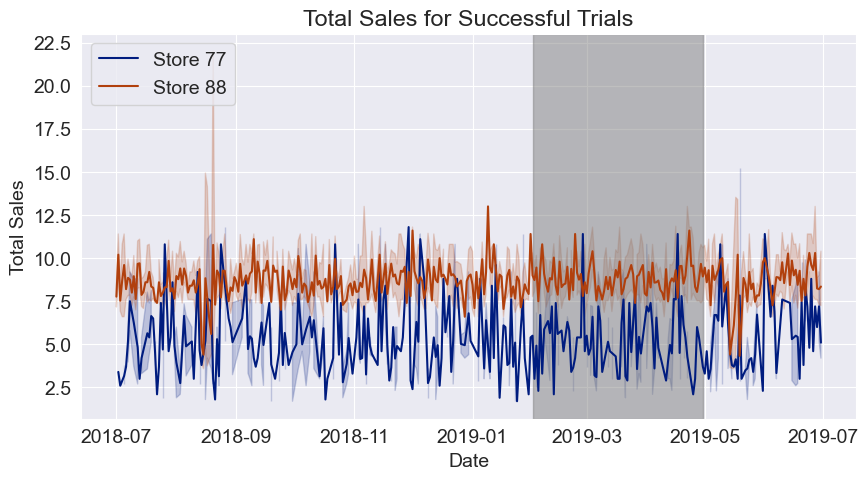

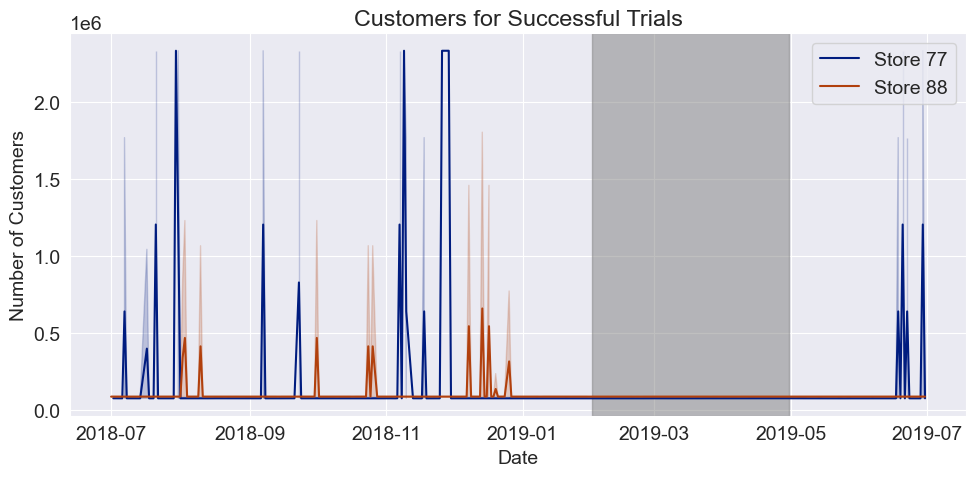

In [100]:
# Filter data for trial stores
trial_77 = data[data['STORE_NBR'] == 77] 
trial_88 = data[data['STORE_NBR'] == 88]

# Plot sales 
plt.figure(figsize=(10,5))
sns.lineplot(data=trial_77, x='DATE', y='TOT_SALES', label='Store 77')
sns.lineplot(data=trial_88, x='DATE', y='TOT_SALES', label='Store 88')
plt.axvspan('2019-02-01', '2019-04-30', alpha=0.5, color='grey') 
plt.xlabel('Date'); plt.ylabel('Total Sales')
plt.title('Total Sales for Successful Trials')
plt.legend()

# Plot customers
plt.figure(figsize=(10,5)) 
sns.lineplot(data=trial_77, x='DATE', y='LYLTY_CARD_NBR', label='Store 77')
sns.lineplot(data=trial_88, x='DATE', y='LYLTY_CARD_NBR', label='Store 88')
plt.axvspan('2019-02-01', '2019-04-30', alpha=0.5, color='grey')
plt.xlabel('Date'); plt.ylabel('Number of Customers') 
plt.title('Customers for Successful Trials')
plt.legend()

plt.tight_layout()
plt.show()